In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading data from json file
df = pd.read_json('C:/Users/kamil/Pulpit/ML/projekt 2021 staż/whats-cooking/train.json')

In [3]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
print("Dataset null values count\n", df.isnull().sum())

Dataset null values count
 id             0
cuisine        0
ingredients    0
dtype: int64


In [5]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [6]:
df_count = pd.DataFrame(columns=['counts'])

In [7]:
import matplotlib.pyplot as plt

In [8]:
df_count['counts'] = df['cuisine'].value_counts()

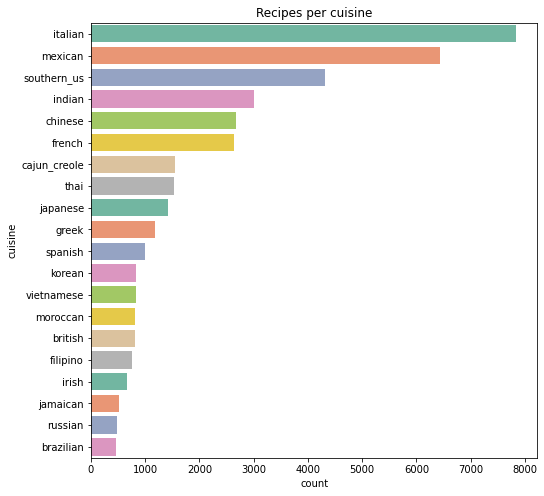

In [9]:
import seaborn as sns
fig = plt.figure(figsize=[8,8])
sns.countplot(data=df, y = "cuisine", order = df.cuisine.value_counts().index, palette="Set2")
plt.title('Recipes per cuisine')
plt.show()


In [10]:
#most popular ingredients in each cuisine
from collections import defaultdict,Counter

ing_grouped = defaultdict(list)

for c,ing in zip(df.cuisine,df.ingredients):
    for i in ing:
        ing_grouped[c].append(i)

In [11]:
# most common ingredients in each cusisine
for i in ing_grouped:
    fq = Counter(ing_grouped[i])
    print(f"Top 5 ingredients in {i} cuisine:")
    print(fq.most_common(5),'\n')

Top 5 ingredients in greek cuisine:
[('salt', 572), ('olive oil', 504), ('dried oregano', 267), ('garlic cloves', 254), ('feta cheese crumbles', 252)] 

Top 5 ingredients in southern_us cuisine:
[('salt', 2290), ('butter', 1255), ('all-purpose flour', 1222), ('sugar', 1054), ('large eggs', 746)] 

Top 5 ingredients in filipino cuisine:
[('salt', 421), ('garlic', 325), ('water', 310), ('onions', 310), ('soy sauce', 251)] 

Top 5 ingredients in indian cuisine:
[('salt', 1934), ('onions', 1195), ('garam masala', 862), ('water', 820), ('ground turmeric', 728)] 

Top 5 ingredients in jamaican cuisine:
[('salt', 332), ('onions', 173), ('water', 153), ('garlic', 139), ('ground allspice', 128)] 

Top 5 ingredients in spanish cuisine:
[('salt', 460), ('olive oil', 387), ('garlic cloves', 290), ('extra-virgin olive oil', 255), ('onions', 253)] 

Top 5 ingredients in italian cuisine:
[('salt', 3454), ('olive oil', 3111), ('garlic cloves', 1619), ('grated parmesan cheese', 1580), ('garlic', 1471)]

In [12]:
# extra cooking terms and ingredients measurements that should be removed 
cooking_terms = ['cooked','cooking','sliced','chopped','baked','caramelized','caramelized',
                 'chop','slice','cook','dash','dashed','dice','diced','dredge','dress',
                 'glaze','glazed','grease','greased','marinated','marinate','fry','fried',
                 'dry','dried','boil','boiled','pinch','roast','roasted','saute','shredded',
                 'steam','steamed','stew','stewed','whip','whipped','fresh','large','grated',
                 'crushed','skinless','unsalted','salted','low-fat','vegan','powdered','grilled',
                 'pitted','full-fat','nonfat','fat-free','squeezed','squeeze','thawed','thaw',
                 'slices','rings','plain','gluten-free','lactose-free','part-skim','italian',
                 'vegetable','green','black','red','ripe','blended','blend','cut','cutted',
                 'bell','romaine','purple','white','baking','purpose','brown',
                 'brazilian','russian','jamaican','irish','filipino','british','maroccan',
                 'vietnamese','korean','spanish','greek','japanese','thai','cajun','french',
                 'chinese','indian','us','southern-us','mexican','italian','american']

cooking_shortcuts = ['tsp','tbsp','oz','qt','lb','gal','g','ml','l','kg','pint']

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = stopwords.words('english')

#extending basic stop_words from nltk by custom ones about cooking
stop_words.extend(cooking_terms)
stop_words.extend(cooking_shortcuts)

In [15]:
all_ing = []
for ing_list in df['ingredients']:
    ing_list = ' '.join(ing_list)
    all_ing.append(ing_list)
df['cleaned'] = all_ing

In [16]:
df.head()

,id,cuisine,ingredients,cleaned
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [17]:
from nltk.stem import PorterStemmer
import re

def preprocessing(df):
    """
    function that cleans document (list of ingredients):
    -removes parentheses, digits, special characters, extra spaces; using regex templates
    -removes stop words with extra added cooking terms
    -stems all remaining words using PorterStemmer
    
    Args:
        df: DataFrame including text to process
    Returns:
        processed: list of strings after all processing is finished
    """
    processed = []
    for r in df:
        r = str(r)
        r.lower()
        r = re.sub('\([^)]*\)', ' ', r)
        r = re.sub('((\d))','',r)
        r = re.sub('[\W+]', ' ', r)
        r = re.sub('\s\w{1}\s', ' ', r)
        r = re.sub('(\s\s+)', ' ', r)
        stem = PorterStemmer()
        temp = ''
        for i in r.split():
            if i not in stop_words:
                temp += stem.stem(i.lower()) + ' '
        processed.append(temp)
    
    return processed

In [18]:
df['cleaned'] = preprocessing(df['ingredients'])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [20]:
X = vectorizer.fit_transform(df['cleaned']).toarray()

In [21]:
from sklearn.preprocessing import LabelEncoder
# encoding labels to number representation
le = LabelEncoder()
y = le.fit_transform(df['cuisine'])

In [22]:
le.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

# splitting whole dataset into train and test parts [80% - 20%]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [25]:
# importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
lr = LogisticRegression(max_iter=400)
rForest = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
scores = []

In [28]:
scores.append(('LogisticRegression',
    cross_val_score(lr, X_train, y_train, 
                    cv=StratifiedKFold(n_splits=3),
                    scoring='accuracy').mean()))


In [29]:
scores.append(('RandomForestClf',
    cross_val_score(rForest, X_train, y_train, 
                    cv=StratifiedKFold(n_splits=3),
                    scoring='accuracy').mean()))

In [30]:
# scores.append(('KNeighbors',
#     cross_val_score(knn, X_train, y_train, 
#                     cv=StratifiedKFold(n_splits=3),
#                     scoring='accuracy').mean()))

In [31]:
for name,score in scores:
    print(name,' :', score)

LogisticRegression  : 0.7676859288850477
RandomForestClf  : 0.7465663622833465


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [34]:
print(lr.score(X_test, y_test))

0.7742300439974859


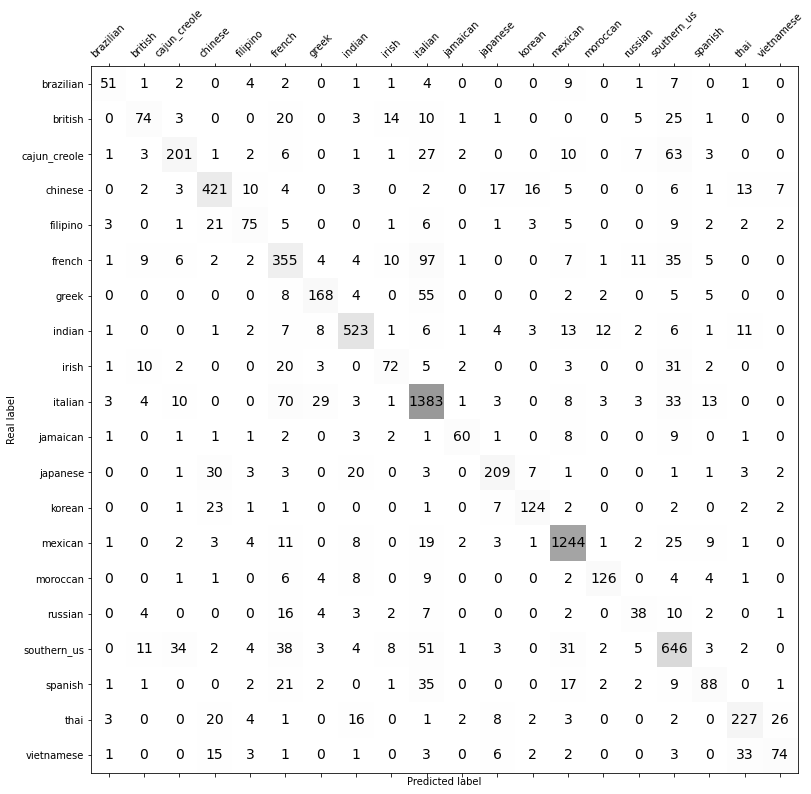

In [35]:
# plot of confusion matrix - analizing performance of classifier
fig, ax = plt.subplots(figsize=(13, 13))
ax.matshow(conf_mat, cmap=plt.cm.Greys, alpha=0.4)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center',fontsize=14)
plt.xticks(range(0,conf_mat.shape[0]),le.inverse_transform(range(0,conf_mat.shape[0])), rotation=45)
plt.yticks(range(0,conf_mat.shape[0]),le.inverse_transform(range(0,conf_mat.shape[0])))

plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_C = [10**n for n in range(-4,4)]
param_solver = ['lbfgs','saga']

In [38]:
param_grid = [{
    'C': param_C,
    'solver': param_solver
}]

In [39]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=2)

In [40]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [41]:
print('Best lr parameters:\n',grid.best_params_)
print('Best score:\n',grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Unsupervised (k-means)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(2)
data = pca.fit_transform(X)

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(le.classes_), n_init=3, max_iter=150)

In [45]:
y_us = kmeans.fit_predict(data)

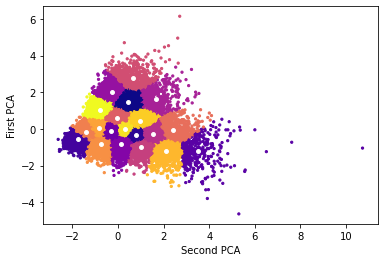

In [46]:
# cluster centers
centers = np.array(kmeans.cluster_centers_)
plt.scatter(data[:, 0], data[:, 1], c=y_us, s=5, cmap='plasma')
plt.scatter(centers[:,0], centers[:,1], marker="o", s=15, color='w')
plt.xlabel('Second PCA')
plt.ylabel('First PCA')
plt.show()

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

print('Silhouette_score for 20 clusters: ',silhouette_score(data, y_us))

Silhouette_score for 20 clusters:  0.3177928414943174


In [48]:
from sklearn.manifold import TSNE

In [49]:
tsne = TSNE(n_components= 2,perplexity= 40).fit_transform(data)

In [50]:
for i in range(len(le.classes_)+1):
    plt.scatter(tsne[y_us == i, 0], tsne[y_us == i, 1], cmap='plasma', label=le.inverse_transform(i))
plt.legend()
plt.show()

ValueError: y should be a 1d array, got an array of shape () instead.